In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import warnings
warnings.simplefilter("ignore")


In [2]:
data=pd.read_csv("books.csv",error_bad_lines=False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [3]:
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [4]:
data.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [5]:
data.shape

(11123, 12)

In [6]:
language=pd.DataFrame(data.groupby("language_code").publisher.value_counts())

In [7]:
language

publisher
language_code publisher                                    
ale           Ballantine Books                            1
ara           American University in Cairo Press          1
en-CA         CDS Books                                   1
              Candlewick Press                            1
              HarperOne                                   1
...                                                     ...
zho           東立                                          8
              皇冠文化出版有限公司                                  2
              聯經出版事業股份有限公司                                2
              時報出版                                        1
              英文漢聲出版股份有限公司                                1

[2921 rows x 1 columns]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [9]:
data.head(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.


# calculating weighted average

In [10]:
v=data["ratings_count"]
R=data["average_rating"]
C=data["average_rating"].mean()
m=data["ratings_count"].quantile(0.70)

In [11]:
data["weighted_average"]=((R*v)+(C*m))/(v+m)

In [12]:
data.weighted_average.head(2)

0    4.569008
1    4.489156
Name: weighted_average, dtype: float64

In [13]:
data=data.sort_values('weighted_average',ascending=False)

In [14]:
data[['title','ratings_count',"authors","average_rating","weighted_average"]].head(10)

,title,ratings_count,authors,average_rating,weighted_average
6587,The Complete Calvin and Hobbes,32213,Bill Watterson,4.82,4.738274
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,41428,J.K. Rowling/Mary GrandPré,4.78,4.718051
6589,It's a Magical World (Calvin and Hobbes #11),23875,Bill Watterson,4.76,4.660409
6,Harry Potter Collection (Harry Potter #1-6),28242,J.K. Rowling,4.73,4.647325
6588,The Calvin and Hobbes Tenth Anniversary Book,49122,Bill Watterson,4.63,4.586520
6591,The Days Are Just Packed,20308,Bill Watterson,4.69,4.585062
6590,Homicidal Psycho Jungle Cat (Calvin and Hobbes...,15365,Bill Watterson,4.72,4.581964
21,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,101233,J.R.R. Tolkien,4.59,4.569454
0,Harry Potter and the Half-Blood Prince (Harry ...,2095690,J.K. Rowling/Mary GrandPré,4.57,4.569008
3,Harry Potter and the Prisoner of Azkaban (Harr...,2339585,J.K. Rowling/Mary GrandPré,4.56,4.559125


# plotting best books on the basis of average rating

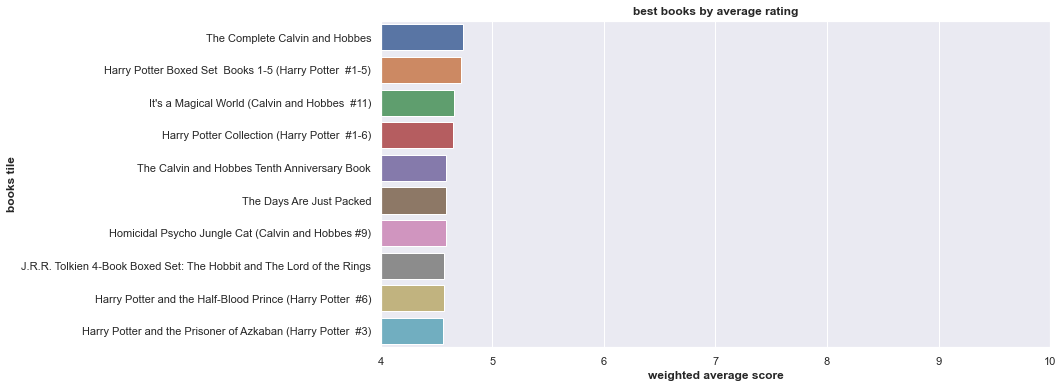

In [15]:
weight_average=data.sort_values("weighted_average",ascending=False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=weight_average["weighted_average"].head(10),y=weight_average["title"].head(10),data=weight_average)
plt.xlim(4,10)
plt.title("best books by average rating",weight="bold")
plt.xlabel("weighted average score",weight='bold')
plt.ylabel("books tile",weight="bold")
plt.savefig("image1.jpg")

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
books_data=scaling.fit_transform(data[["weighted_average","average_rating"]])
books_scaled_data=pd.DataFrame(books_data,columns=["weighted_average","average_rating"])
books_scaled_data.head(10)

,weighted_average,average_rating
0,1.000000,0.964
1,0.988649,0.956
2,0.956295,0.952
3,0.948951,0.946
4,0.914821,0.926
5,0.914003,0.938
6,0.912263,0.944
7,0.905242,0.918
8,0.904992,0.914
9,0.899444,0.912


In [17]:
data[["scaled_weighted_average","scaled_rating"]]=books_scaled_data

In [18]:
data.head(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,weighted_average,scaled_weighted_average,scaled_rating
6587,24812,The Complete Calvin and Hobbes,Bill Watterson,4.82,0740748475,9780740748479,eng,1456,32213,930,9/6/2005,Andrews McMeel Publishing,4.738274,0.548068,0.782
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,4.718051,0.914821,0.926


# giving 50% importance to both rating and weighted average

In [19]:
data["score"]=data["scaled_weighted_average"]*0.5+data["scaled_rating"]*0.5
data=data.sort_values(["score"],ascending=False)
data[["title","scaled_weighted_average","scaled_rating","score"]].head(20)

,title,scaled_weighted_average,scaled_rating,score
0,Harry Potter and the Half-Blood Prince (Harry ...,1.000000,0.964,0.982000
1,Harry Potter and the Order of the Phoenix (Har...,0.988649,0.956,0.972324
2,Harry Potter and the Chamber of Secrets (Harry...,0.956295,0.952,0.954147
3,Harry Potter and the Prisoner of Azkaban (Harr...,0.948951,0.946,0.947475
6,Harry Potter Collection (Harry Potter #1-6),0.912263,0.944,0.928132
5,"Unauthorized Harry Potter Book Seven News: ""Ha...",0.914003,0.938,0.926001
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,0.914821,0.926,0.920410
7,The Ultimate Hitchhiker's Guide: Five Complete...,0.905242,0.918,0.911621
8,The Ultimate Hitchhiker's Guide to the Galaxy ...,0.904992,0.914,0.909496
9,The Hitchhiker's Guide to the Galaxy (Hitchhik...,0.899444,0.912,0.905722


# plotting best books on the basis of score calculated above

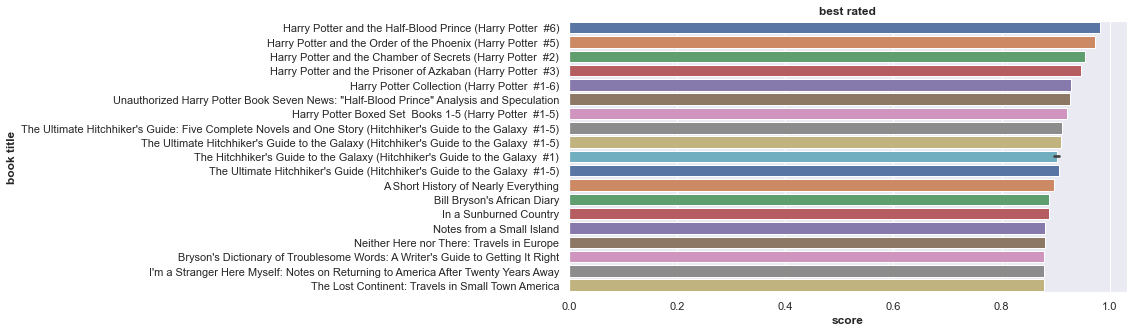

In [29]:
score_data=data.sort_values('score',ascending=False)
plt.figure(figsize=(10,5))
ax=sns.barplot(x=score_data["score"].head(20),y=score_data["title"].head(20),data=score_data,palette="deep")
plt.title("best rated",weight="bold")
plt.xlabel("score",weight="bold")
plt.ylabel("book title",weight="bold")
plt.savefig("image2.jpg")

In [21]:
data.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,weighted_average,scaled_weighted_average,scaled_rating,score
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,4.569008,1.000000,0.964,0.982000
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,4.489156,0.988649,0.956,0.972324
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,4.254414,0.956295,0.952,0.954147
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,4.559125,0.948951,0.946,0.947475
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic,4.647325,0.912263,0.944,0.928132


In [22]:
from scipy.sparse import csr_matrix
user_rating=data.drop_duplicates(["bookID","title"])
user_rating_pivots=data.pivot(index="title",columns="bookID",values="score").fillna(0)
user_rating_matrix=csr_matrix(user_rating_pivots.values)

In [23]:
user_rating_pivots

bookID,1,2,4,5,8,9,10,12,13,14,...,45617,45623,45625,45626,45630,45631,45633,45634,45639,45641
title,,,,,,,,,,,,,,,,,,,,,
said the shotgun to the head.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$30 Film School: How to Write Direct Produce Shoot Edit Distribute Tour With and Sell Your Own No-Budget Digital Movie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1 000 Places to See Before You Die,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 lb Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
鋼之鍊金術師 6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
鋼之鍊金術師 7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
鋼之鍊金術師 9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from sklearn.neighbors import NearestNeighbors
model_knn=NearestNeighbors(metric="cosine",algorithm="brute")
model_knn.fit(user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [25]:
query_index=np.random.choice(user_rating_pivots.shape[0])
print(query_index)

1404


In [26]:
distances,indices=model_knn.kneighbors(user_rating_pivots.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)

In [27]:
for i in range(0,len(distances.flatten())):
    if i==0:
        print("recommendation for {0}:\n".format(user_rating_pivots.index[query_index]))
    else:
        print("{0}:{1}with distances of {2}:".format(i,user_rating_pivots.index[indices.flatten()[i]],distances.flatten()[i]))

recommendation for Chosen Prey (Lucas Davenport  #12):

1:The Book of Other Peoplewith distances of 1.0:
2:The Book of Ruthwith distances of 1.0:
3:The Book of Questionswith distances of 1.0:
4:The Book of My Lifewith distances of 1.0:
5:The Book of Merlyn: The Unpublished Conclusion to The Once & Future Kingwith distances of 1.0:
